<a href="https://colab.research.google.com/github/konkuk-gaegul/2nd-Team-Project/blob/main/%ED%95%98%EC%9D%B4%EB%8B%89%EC%8A%A4_%EC%8B%9C%EA%B0%81%ED%99%94_%EC%95%88%EC%9E%AC%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rcParams

!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumGothic'
rcParams['axes.unicode_minus'] = False

font_manager._rebuild()

# 소숫점 둘 째 자리까지 표시
pd.options.display.float_format = '{:.2f}'.format

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
# 성장 / 수익 / 안정지표 모아주기
Stable_ind   =  pd.read_csv('/content/drive/MyDrive/data/SKhynix_data/2_안정성 지표/stable_ind.csv', index_col = 0)
Profit_ind   =  pd.read_csv('/content/drive/MyDrive/data/SKhynix_data/2_수익성 지표/Profit_indicator.csv', index_col = 0)
Increase_ind =  pd.read_csv('/content/drive/MyDrive/data/SKhynix_data/2_성장성 지표/increase_indicator.csv', index_col = 0)

hynix_table = Stable_ind.join(Profit_ind )
hynix_table = hynix_table.join(Increase_ind )
hynix_table

# 투자지표 저장
# pd.DataFrame( hynix_table ).to_csv('/content/drive/MyDrive/data/SKhynix_data/Investment_indicator.csv')

,유동비율(%),부채비율(%),ROE(%),ROIC(%),영업이익률(%),매출액 증가율(%),자기자본 증가율(%)
2011/12,102.48,118.89,-0.71,1.96,3.55,-14.13,-0.41
2012/12,119.64,91.48,-1.63,-1.23,-2.24,-2.25,23.67
2013/12,216.13,59.16,21.99,20.23,23.86,39.39,34.16
2014/12,179.76,49.05,23.26,21.42,29.84,20.90,38.03
2015/12,201.62,38.76,20.22,19.57,28.39,9.77,18.58
2016/12,236.47,34.10,12.32,11.95,19.05,-8.51,12.32
2017/12,213.28,34.29,31.47,32.37,45.57,75.08,40.78
2018/12,152.66,35.87,33.17,31.82,51.54,34.33,38.53
2019/12,181.58,36.12,4.19,4.50,10.07,-33.27,2.31
2020/12,182.65,37.11,9.17,6.47,15.71,18.19,8.29


# 안정성지표 시각화

유동비율
기업의 유동성을 판단하는 지표. 즉, 기업의 지급능력(?) 또는 상환능력을 뜻함. 

더 직관적으로 표현하면 기업이 보유한 자산을 팔아서 1년 이내 만기가 도래할 부채를 상환할 수 있는가?

그렇게 현금을 동원할 능력이 어느정도 되는가를 가늠하는 요소.

200% 넘어야 양호. 유동비율이 높을 수록 유동자산이 훨씬 많은 것

부채비율은 기업의 건정성, 안전성을 판단하는 지표. 즉, 자기자본 대비 부채가 얼마나 있는지 볼 수 있음.

100% 미만일 때 재무구조가 우량하다는 평가를 받는다.

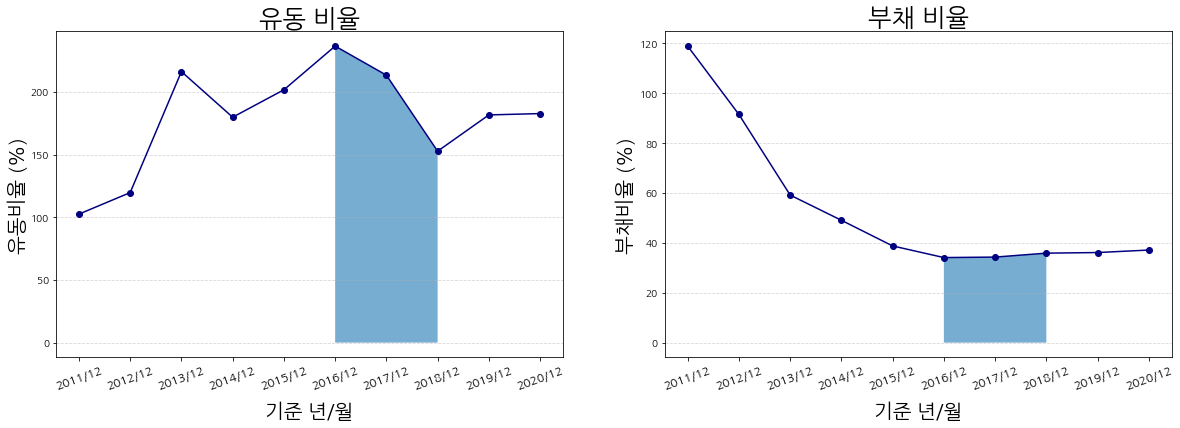

In [ ]:
plt.figure( figsize = (20, 6) )
plt.subplot(1, 2, 1)

plt.plot( hynix_table['유동비율(%)'] , marker='o', color = 'navy')
plt.xlabel('기준 년/월', labelpad=10, fontsize=20)
plt.ylabel('유동비율 (%)', labelpad=3, fontsize=20)
plt.title('유동 비율', fontsize=25)
plt.grid(True, axis='y', alpha=0.5, linestyle='--')
plt.xticks( rotation = 20, fontsize=12)
# 유동비율의 2016~2018년 영역 색칠하기
x = hynix_table.index
y = hynix_table['유동비율(%)']
plt.fill_between( x[5:8] , y[5:8] , alpha=0.6)

plt.subplot(1, 2, 2)
plt.plot( hynix_table['부채비율(%)'] , marker='o', color = 'navy')
plt.xlabel('기준 년/월', labelpad=10, fontsize=20)
plt.ylabel('부채비율 (%)', labelpad=3, fontsize=20)
plt.xticks( rotation = 20, fontsize=12)
plt.title('부채 비율', fontsize=25)
plt.grid(True, axis='y', alpha=0.5, linestyle='--')

# 부채비율의 2016~2018년 영역 색칠하기
x = hynix_table.index
y = hynix_table['부채비율(%)']
plt.fill_between( x[5:8] , y[5:8] , alpha=0.6)

<function matplotlib.pyplot.show>

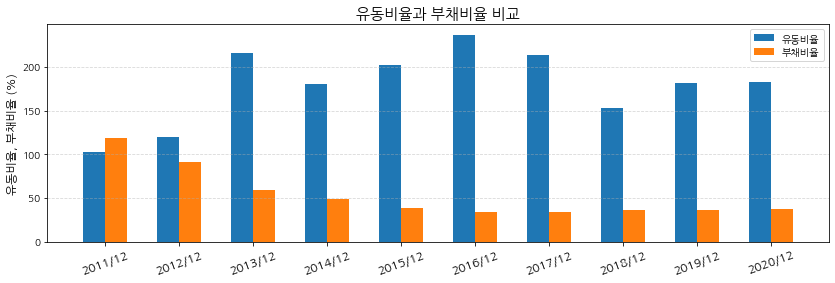

<Figure size 1440x720 with 0 Axes>

In [ ]:
x = np.arange( len(hynix_table.index)) # x=[0,1,2,3,4,5,6,7,8,9]
y_1 = hynix_table['유동비율(%)']
y_2 = hynix_table['부채비율(%)']

# 넓이 지정
width = 0.3

# subplots 설정
fig, axes = plt.subplots()

# 그래프
axes.bar(x - width/2, y_1, width)
axes.bar(x + width/2, y_2, width)

# ticks & label 설정
plt.xticks(x)
axes.set_xticklabels(hynix_table.index)
plt.xticks( rotation = 20, fontsize=12)
plt.ylabel('유동비율, 부채비율 (%)', fontsize=12)

# title
plt.title('유동비율과 부채비율 비교', fontsize = 15)

# legend
plt.legend(['유동비율', '부채비율'])
plt.grid(True, axis='y', alpha=0.5, linestyle='--')
plt.figure(figsize=(20, 10))
plt.show

유동비율은 2016~2017년 두 해에 걸쳐 유동비율이 각 20%, 60% 감소하는 추세를 보였다. 

2021년까지 점차 회복하는 모습을 보였으나, 200%가 넘어야 양호한 재무구조로 평가 받을 수 있기 때문에 아쉬운 모습이다.

부채비율은 2011~2013년 3년에 걸쳐 60% 이상 감소하였다. 이는 유동비율이 급상승한 해와 같음을 볼 수 있다.

역시나 유동비율이 급하락한 해(2017~2018)의 부채비율은 소폭 상승한 것을 보면 둘은 과연 연관 관계에 있을까? 궁금하다. 이따 해보자

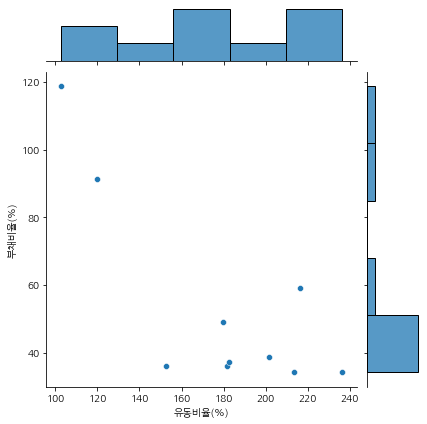

In [ ]:
# jointplot으로 상관관계를 알아보쟈
sns.jointplot( x=hynix_table['유동비율(%)'], y=hynix_table['부채비율(%)'], kind='scatter' )

# 수익성지표 시각화

Return On Equity : 순이익 / 자본이다. '순이익'은 최종적으로 벌어들인 돈, '자본'은 투자한 돈

즉, ROE는 투자한 금액 대비 얼마나 벌어들였는가?의 지표이며 효율적으로 사용했는지를 보여준다.

ROE는 다른 산업군 간의 수익성 비교를 가능하게 한다. (같은 산업군에선 매출액 또는 순이익률도 의미있다.)

ROE가 높을 수록, 같은 자본 대비 수익성이 더 높다는 뜻이다. 한편, 수익성뿐 아니라 성장성의 지표가 되기도 한다.

Return On Invested Capital : 투하자본 대비 얼마의 이익을 벌어들이는가의 지표.

이는 오로지 영업활동을 위한 자산과 그로인한 이익으로 수익성을 나타낸다. 즉, 영업 활동만 따로 빼내와서 생각해보자

ROA와 ROIC의 격차가 클 수록 회사 내에서 놀고있는 자산이 많다는 뜻

당기순이익, ROA, ROIC를 비교해보고, 그 격차도 주의깊게 보자.





In [ ]:
# ROE / ROIC는 당기순이익과 비교
# 영업이익률은 매출액과 비교
income_statement = pd.read_csv('/content/drive/MyDrive/data/SKhynix_data/1_손익계산서/income_statement.csv', index_col = 0)

data1 = []
data2 = []
for i in range(len(income_statement['당기순이익'])):
  data1.append(income_statement['당기순이익'][i] / 100000000000)  # 천억 단위 당기순이익

for j in range(len(income_statement['매출액'])):
  data2.append(income_statement['매출액'][j] / 100000000000)     # 천억 단위 매출액

dicts = {'당기순이익(천억 원)':data1, '매출액(천억 원)' : data2}          # 당기순이익과 매출액을 딕셔너리 형태로 저장
data = pd.DataFrame(dicts)                                    # 데이터 프레임으로 만들어주기

data.set_index( income_statement.index, inplace=True)
data.drop(index= income_statement.index[0] , inplace=True)
data


,당기순이익(천억 원),매출액(천억 원)
2011/12,-0.56,103.96
2012/12,-1.59,101.62
2013/12,28.73,141.65
2014/12,41.95,171.26
2015/12,43.24,187.98
2016/12,29.60,171.98
2017/12,106.42,301.09
2018/12,155.40,404.45
2019/12,20.09,269.91
2020/12,47.59,319.00


In [ ]:
hynix_table

,유동비율(%),부채비율(%),ROE(%),ROIC(%),영업이익률(%),매출액 증가율(%),자기자본 증가율(%)
2011/12,102.48,118.89,-0.71,1.96,3.55,-14.13,-0.41
2012/12,119.64,91.48,-1.63,-1.23,-2.24,-2.25,23.67
2013/12,216.13,59.16,21.99,20.23,23.86,39.39,34.16
2014/12,179.76,49.05,23.26,21.42,29.84,20.90,38.03
2015/12,201.62,38.76,20.22,19.57,28.39,9.77,18.58
2016/12,236.47,34.10,12.32,11.95,19.05,-8.51,12.32
2017/12,213.28,34.29,31.47,32.37,45.57,75.08,40.78
2018/12,152.66,35.87,33.17,31.82,51.54,34.33,38.53
2019/12,181.58,36.12,4.19,4.50,10.07,-33.27,2.31
2020/12,182.65,37.11,9.17,6.47,15.71,18.19,8.29


In [ ]:
financial_statement = pd.read_csv('/content/drive/MyDrive/data/SKhynix_data/1_손익계산서/income_statement.csv', index_col = 0)

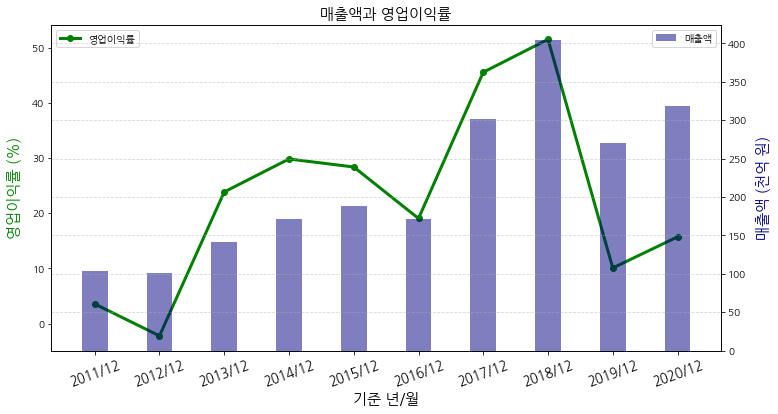

In [ ]:
# 매출액과 영업이익률
plt.figure(figsize=(12,6))

plt.plot(hynix_table['영업이익률(%)'], color='green', linewidth=3, marker='o', label='영업이익률')
plt.ylabel('영업이익률 (%)', color='green', labelpad = 10, fontsize=15)
plt.xlabel('기준 년/월', fontsize=15)
plt.xticks( rotation = 20, fontsize=13)
plt.legend(loc = 'upper left')

ax=plt.gca()
ax2=ax.twinx()

ax2.bar(data.index, data['매출액(천억 원)'],alpha=0.5 ,width=0.4, color='navy' , label = '매출액' )
ax2.set_ylabel('매출액 (천억 원)', color='navy' , labelpad = 10 , fontsize=15)
plt.legend(loc = 'upper right')

plt.title('매출액과 영업이익률', fontsize=15)
plt.grid(True, axis='y', alpha=0.5, linestyle='--')
plt.show()

2013년부터 2018년까지 매출액이 증가함에 따라 영업이익률도 높아졌다.

역시나 2019년 매출액이 급락한 만큼 영업이익률도 떨어졌고, 2020년 두 지표 모두 반등한 모습을 보인다.

매출액과 영업이익률은 관계성이 매우 커 보인다.

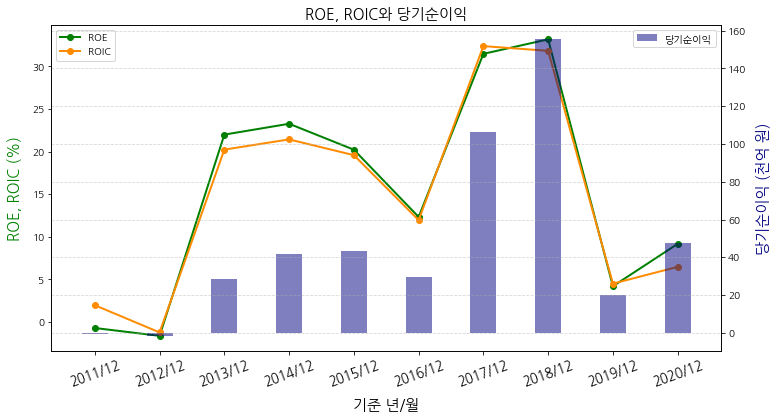

In [ ]:
# 당기순이익과 ROE, ROIC
fig = plt.figure( figsize=(12,6))
fig.set_facecolor('white')
ax = fig.add_subplot()

ax.plot(hynix_table['ROE(%)'], color='green',linewidth=2, marker='o', label = 'ROE')
ax.plot(hynix_table['ROIC(%)'], color='darkorange',linewidth=2,marker='o', label = 'ROIC')
ax.set_xlabel('기준 년/월', labelpad = 10, fontsize=15)
plt.xticks( rotation = 20, fontsize=13)
ax.set_ylabel('ROE, ROIC (%)', color='green', labelpad = 10, fontsize=15)
plt.legend(loc='upper left')

ax2 = ax.twinx()

ax2.bar(data.index, data['당기순이익(천억 원)'], alpha=0.5 , width=0.4 , color='navy', label = '당기순이익' )
ax2.set_ylabel('당기순이익 (천억 원)',color='navy', labelpad = 10, fontsize=15)
plt.legend(loc = 'upper right')

plt.title('ROE, ROIC와 당기순이익', fontsize=15)
plt.grid(True, axis='y', alpha=0.5, linestyle='--')

자본총계와 ROE, ROIC를 비교해보자

In [ ]:
financial_stm = pd.read_csv('/content/drive/MyDrive/data/SKhynix_data/1_재무상태표/financial_statement.csv', index_col = 0)
financial_stm = financial_stm['자본총계']

total_capital = pd.DataFrame(financial_stm)

total_capital.drop( index=total_capital.index[0], inplace = True )
total_capital

,자본총계
2011/12,7875271000000.00
2012/12,9739442000000.00
2013/12,13066859000000.00
2014/12,18036303000000.00
2015/12,21387703000000.00
2016/12,24023530000000.00
2017/12,33820919000000.00
2018/12,46852331000000.00
2019/12,47935882000000.00
2020/12,51909097000000.00


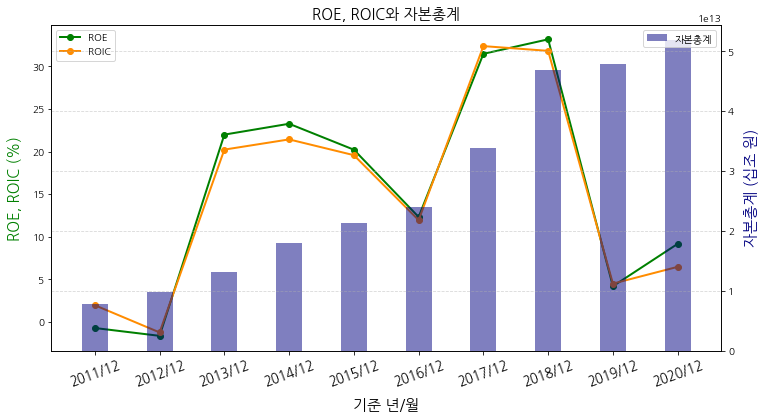

In [ ]:
# 당기순이익과 ROE, ROIC
fig = plt.figure( figsize=(12,6))
fig.set_facecolor('white')
ax = fig.add_subplot()

ax.plot(hynix_table['ROE(%)'], color='green',linewidth=2, marker='o', label = 'ROE')
ax.plot(hynix_table['ROIC(%)'], color='darkorange',linewidth=2,marker='o', label = 'ROIC')
ax.set_xlabel('기준 년/월', labelpad = 10, fontsize=15)
plt.xticks( rotation = 20, fontsize=13)
ax.set_ylabel('ROE, ROIC (%)', color='green', labelpad = 10, fontsize=15)
plt.legend(loc='upper left')

ax2 = ax.twinx()

# 자본총계
ax2.bar(total_capital.index, total_capital['자본총계'], alpha=0.5 , width=0.4 , color='navy', label = '자본총계' )
ax2.set_ylabel('자본총계 (십조 원)',color='navy', labelpad = 10, fontsize=15)
plt.legend(loc = 'upper right')

plt.title('ROE, ROIC와 자본총계', fontsize=15)
plt.grid(True, axis='y', alpha=0.5, linestyle='--')

ROE와 비교해 ROIC는 영업 활동만 따로 교려한 지표이다. 

따라서 ROE와 ROIC의 격차가 적을 수록 회사 내에서 놀고있는 자산이 많다는 뜻이다.

하이닉스는 자산(부채+자본)을 잘 이용하는 것 처럼 보인다. 

이 그래프도 마찬가지로 2018~2019년 사이에 무슨 일이 있었길래 매출과 순이익이 떡락했을까 궁금하다...



ROE의 정규분포

평균이 0이고, 표준편차가 1인 정규분포를 표준정규분포라고 한다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


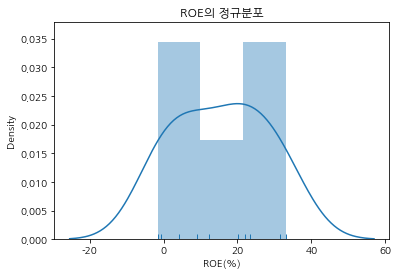

In [ ]:
sns.distplot(hynix_table['ROE(%)'], kde=True, rug=True)
plt.title('ROE의 정규분포')
plt.show()



# 성장성지표 시각화

매출액증가율 : 경영성과의 변화를 설명하는 지표이다. 

산업 전체의 매출액증가율보다 기업의 증가율이 높으면 시장점유율이 확대되고 있다는 것을 의미한다.

매출액이 증가하는 것은 기업의 성장성을 보여주며, 재무건정성이 증가되는 지표가 된다.

자기자본증가율 : 전기 말 대비 당기 말 자기자본의 증가한 비율을 측정한 것으로 자기자본의 충실화 정도의 지표.

자기자본은 유상증사, 이익의 내부유보 등으로 증가하므로 자기자본이 증가하는 것은 기업의 재무구조가 충실해진다는 것을 의미

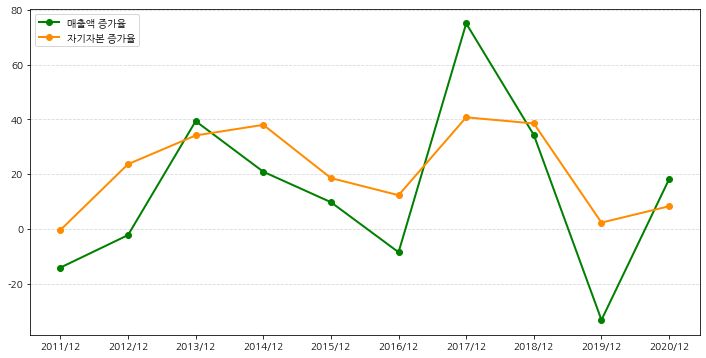

In [ ]:
# 매출액 / 자기자본 증가율
fig = plt.figure( figsize = (12,6) )
fig.set_facecolor('white')
ax = fig.add_subplot()

ax.plot(hynix_table['매출액 증가율(%)'], color='green' , linewidth=2 , marker='o' , label = '매출액 증가율' )
ax.plot(hynix_table['자기자본 증가율(%)'], color='darkorange',linewidth=2,marker='o', label = '자기자본 증가율')
plt.legend(loc = 'upper left')
plt.grid(True, axis='y', alpha=0.5, linestyle='--')

2013~2015년 ROE와 ROIC는 증가 or 일정했는데 얘는 왜 감소할까??

ROE, ROIC와 함께 그려보자

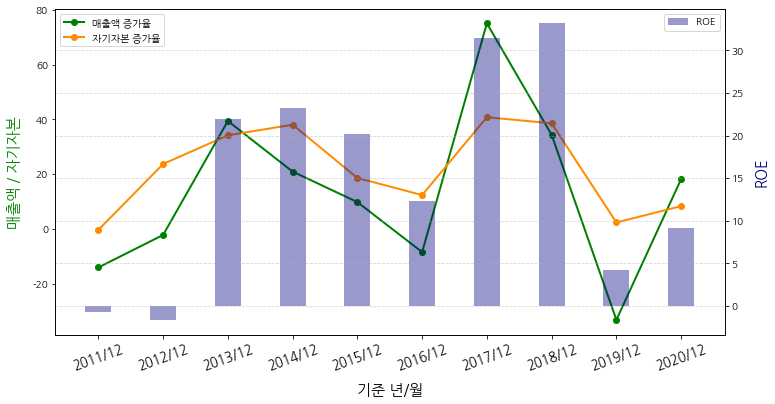

In [ ]:
# 매출액 / 자기자본 증가율
fig = plt.figure( figsize = (12,6) )
fig.set_facecolor('white')
ax = fig.add_subplot()


ax.plot(hynix_table['매출액 증가율(%)'], color='green' , linewidth=2 , marker='o' , label = '매출액 증가율' )
ax.plot(hynix_table['자기자본 증가율(%)'], color='darkorange',linewidth=2,marker='o', label = '자기자본 증가율')
ax.set_xlabel('기준 년/월', labelpad = 10, fontsize=15)
plt.xticks( rotation = 20, fontsize=13)
ax.set_ylabel('매출액 / 자기자본', color='green', labelpad = 10, fontsize=15)
plt.legend(loc = 'upper left')

# ROE
ax2 = ax.twinx()
ax2.bar(hynix_table.index, hynix_table['ROE(%)'] , alpha=0.4,width=0.4 , color='navy' , linewidth=2 , label = 'ROE' )
ax2.set_ylabel('ROE',color='navy', labelpad = 10, fontsize=15)
plt.legend(loc = 'upper right')

plt.grid(True, axis='y', alpha=0.5, linestyle='--')

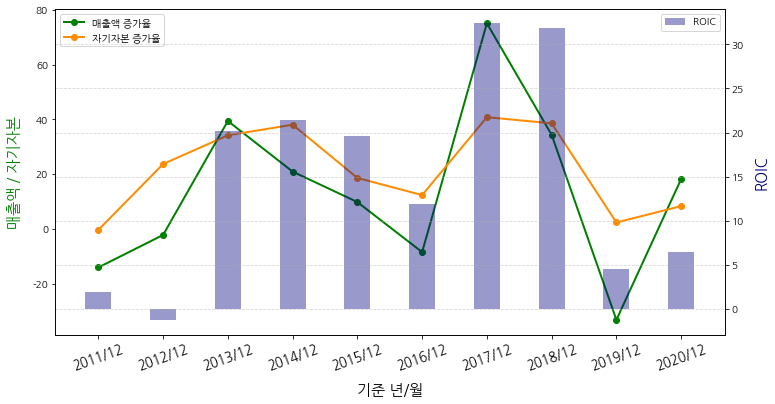

In [ ]:
# 매출액 / 자기자본 증가율
fig = plt.figure( figsize = (12,6) )
fig.set_facecolor('white')
ax = fig.add_subplot()

ax.plot(hynix_table['매출액 증가율(%)'], color='green' , linewidth=2 , marker='o' , label = '매출액 증가율' )
ax.plot(hynix_table['자기자본 증가율(%)'], color='darkorange',linewidth=2,marker='o', label = '자기자본 증가율')
ax.set_xlabel('기준 년/월', labelpad = 10, fontsize=15)
plt.xticks( rotation = 20, fontsize=13)
ax.set_ylabel('매출액 / 자기자본', color='green', labelpad = 10, fontsize=15)
plt.legend(loc = 'upper left')

# ROIC
ax2 = ax.twinx()
ax2.bar(hynix_table.index, hynix_table['ROIC(%)'] , alpha=0.4 , color='navy', width = 0.4, linewidth=2 , label = 'ROIC' )
ax2.set_ylabel('ROIC',color='navy', labelpad = 10, fontsize=15)
plt.legend(loc = 'upper right')

plt.grid(True, axis='y', alpha=0.5, linestyle='--')

2017~2018년의 매출액, 자기자본이 감소했으나 ROE와 ROIC는 소폭 증가했다.

하지만 2019년 되자마자 3개 요소 모두 떡락